In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from statsmodels.tsa.seasonal import STL
import pandas as pd
from matplotlib import style

In [10]:
data = pd.read_csv('C:\\Users\\disha\\OneDrive\\Desktop\\data.csv',parse_dates=['timestamp'])
data.set_index('timestamp', inplace=True)

[896, 853, 723, 600, 660, 958, 981, 868, 286]


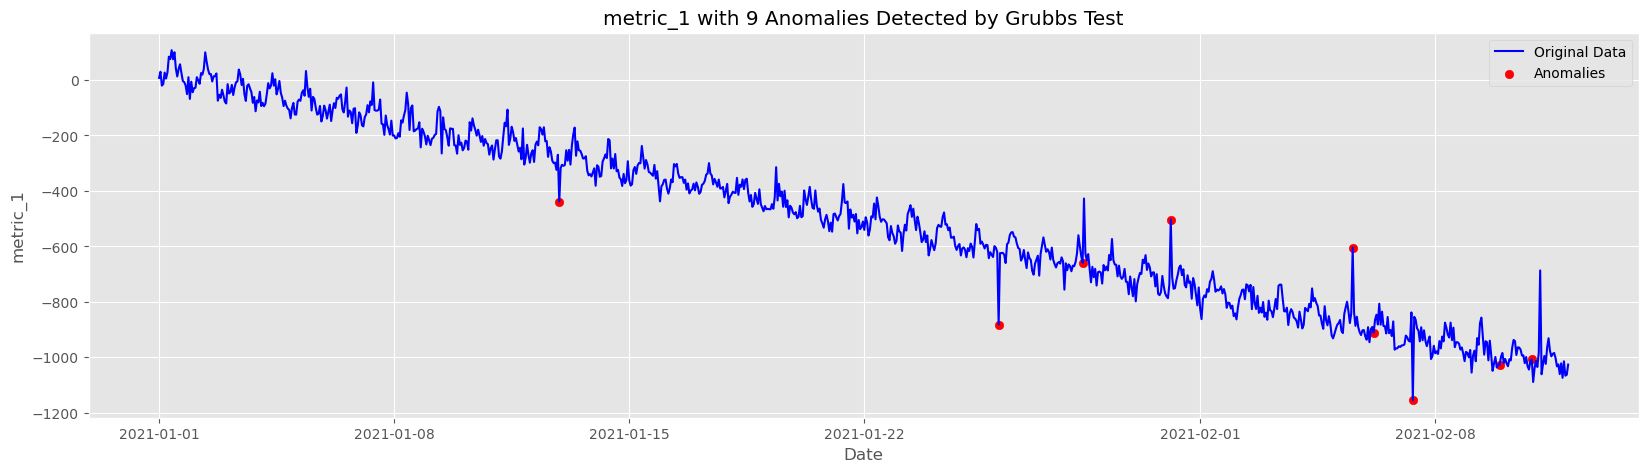

[902, 809, 639, 658, 765, 605, 411, 827, 918, 355, 658, 869, 737, 777, 612, 306, 578, 629]


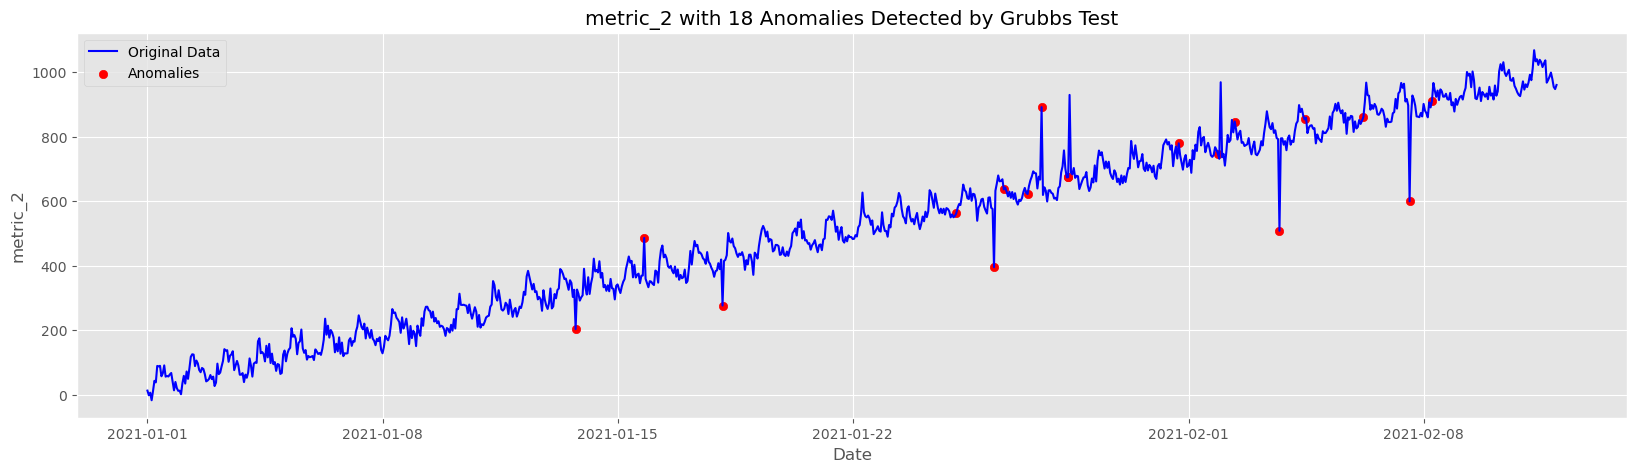

[736, 483, 613, 594, 515]


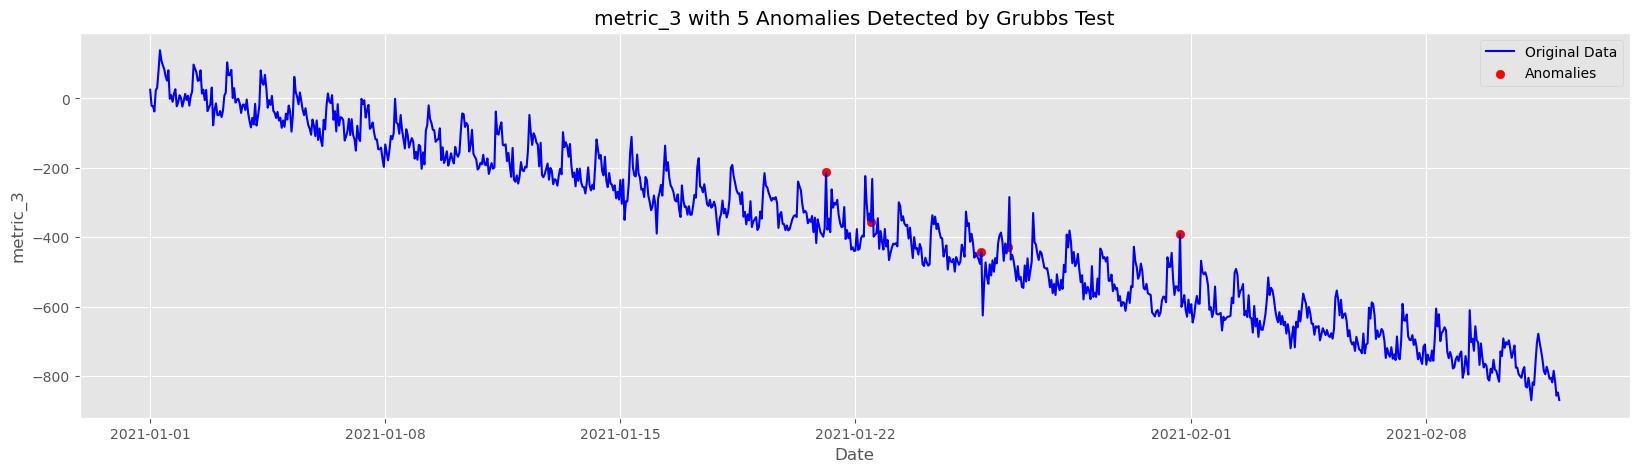

[780, 587, 565, 592, 539, 402, 353, 355, 341, 610, 794, 817, 747, 262, 535, 601, 580]


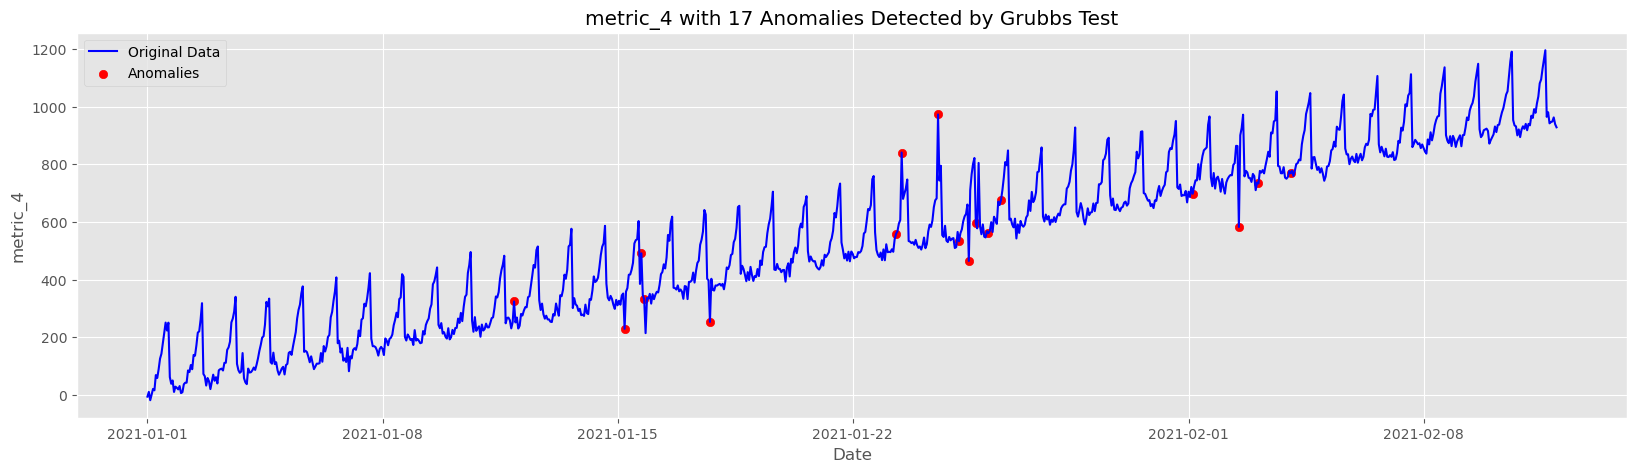

[949, 925, 943, 633, 866, 857, 721, 990, 656, 316, 608, 260, 266, 836]


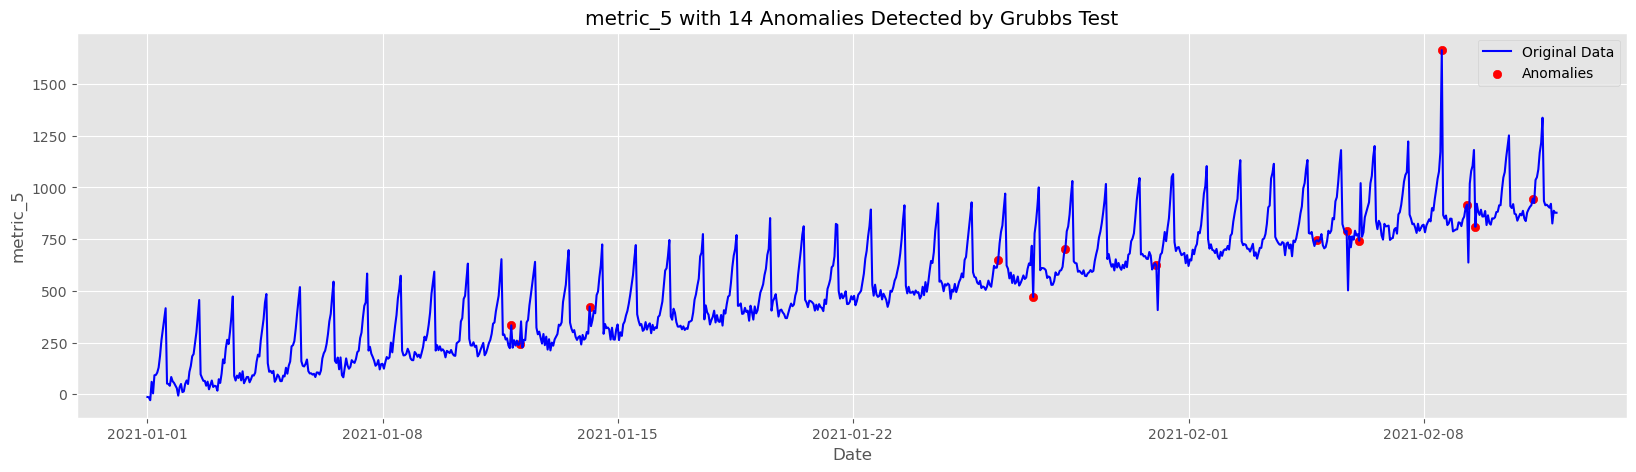

[937, 769, 772, 476, 274, 358, 908, 742]


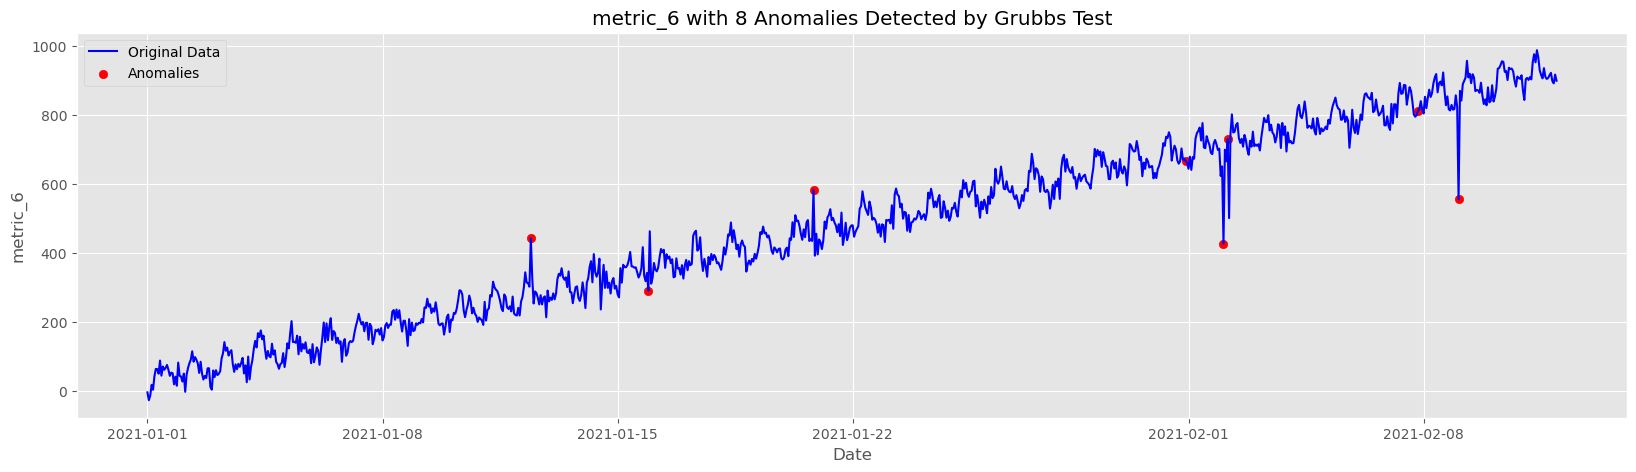

[379, 541, 652, 699, 769, 392, 577, 563, 435, 343, 271, 399, 715]


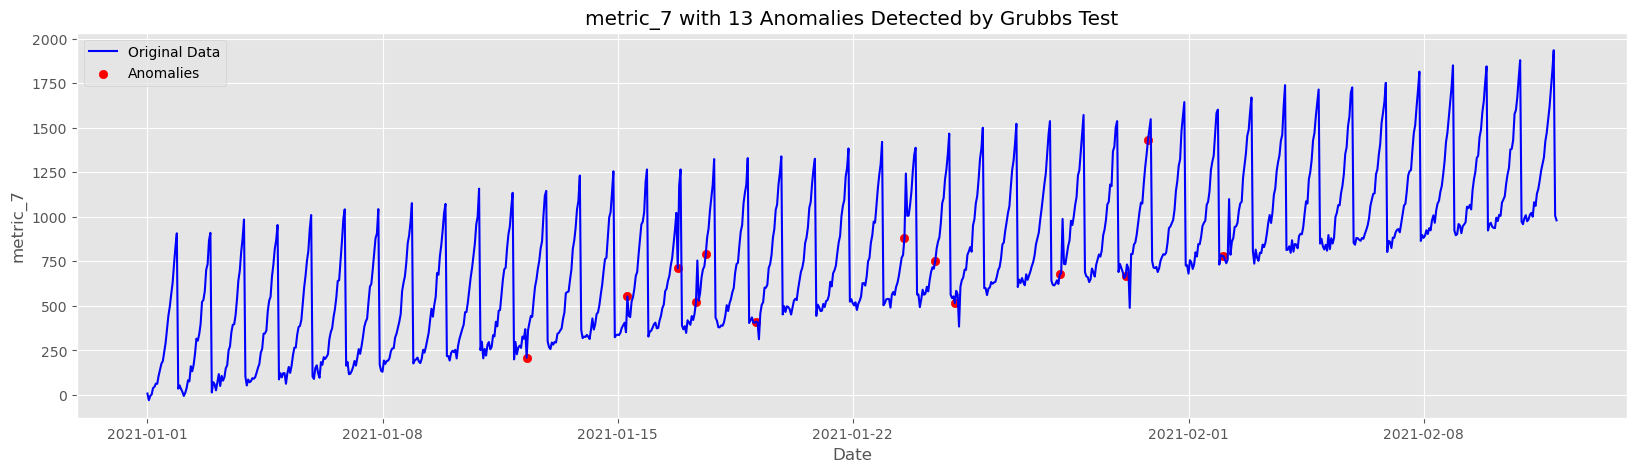

[922, 885, 608, 272, 390, 300, 533, 572, 938, 902]


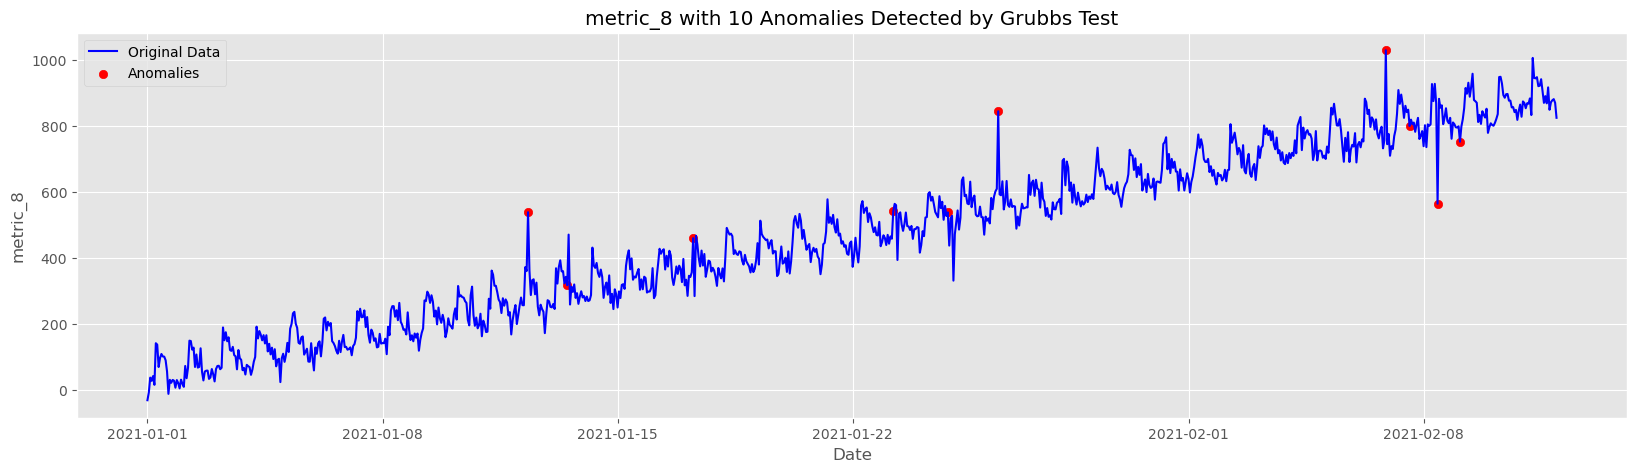

[954, 922, 820, 781, 617, 439, 817, 549, 793, 838, 921, 770, 248, 798, 887, 834, 590, 752, 788, 928, 524, 957, 635, 570, 461, 414, 976]


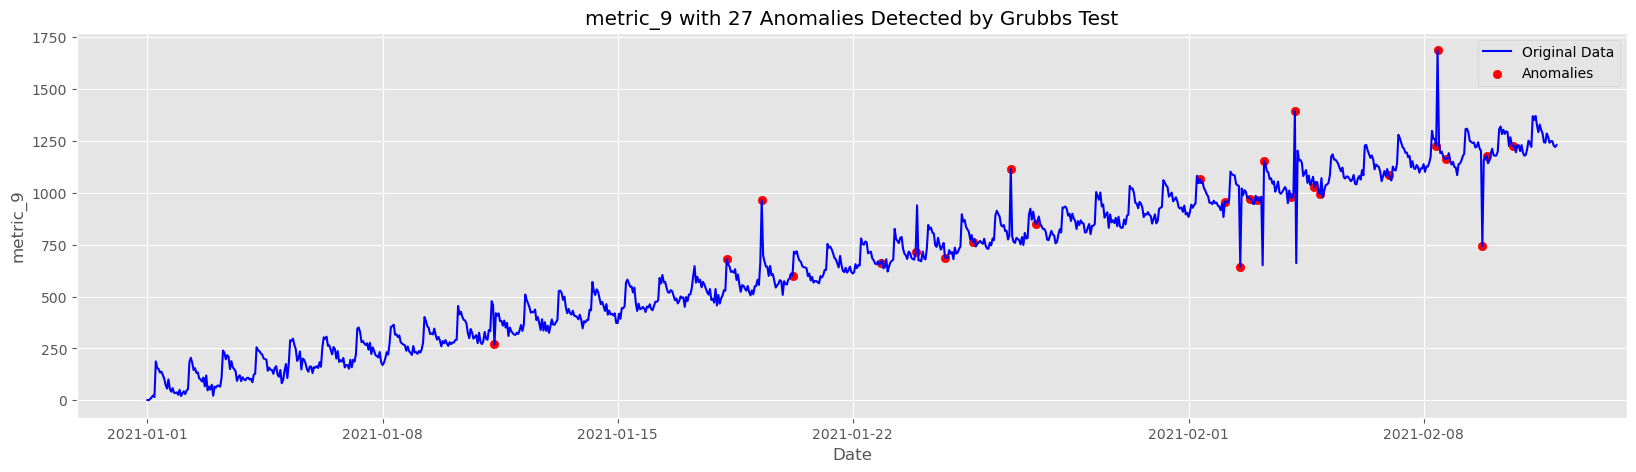

[823, 846, 856, 725, 745, 566, 644, 458, 402, 827, 872, 697, 340, 716, 761, 740, 788, 855]


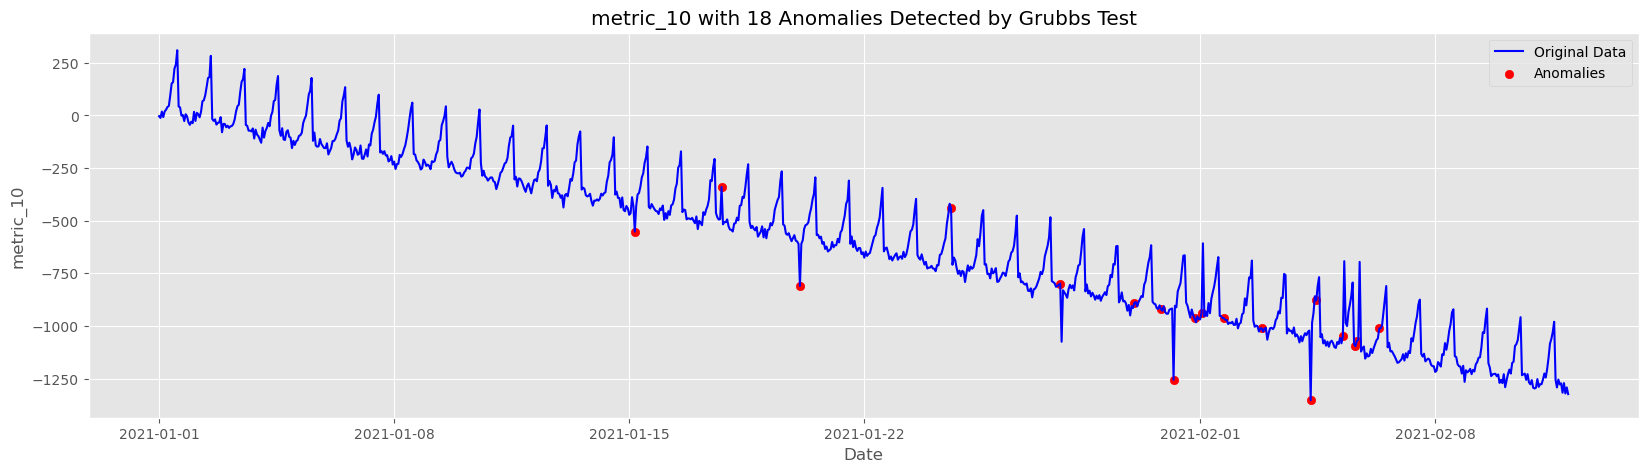

[939, 818, 902, 948, 595, 924, 436, 422, 439, 302, 908, 789, 835, 871]


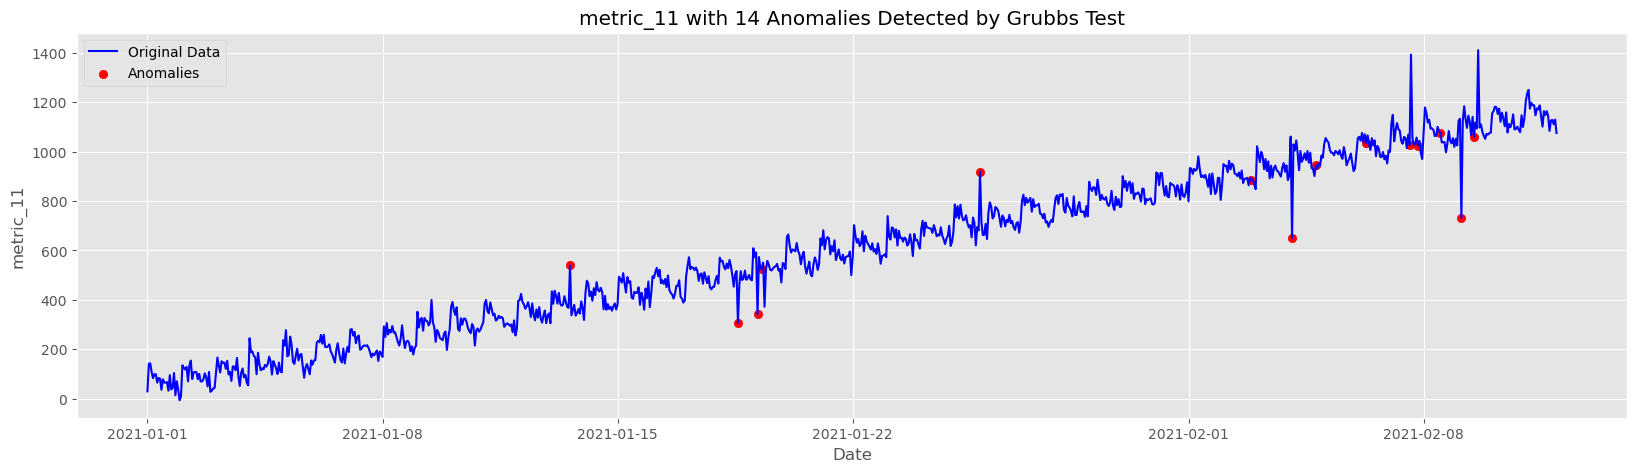

[942, 839, 825, 887, 940, 728, 813, 550, 914, 812, 799, 856, 549, 526]


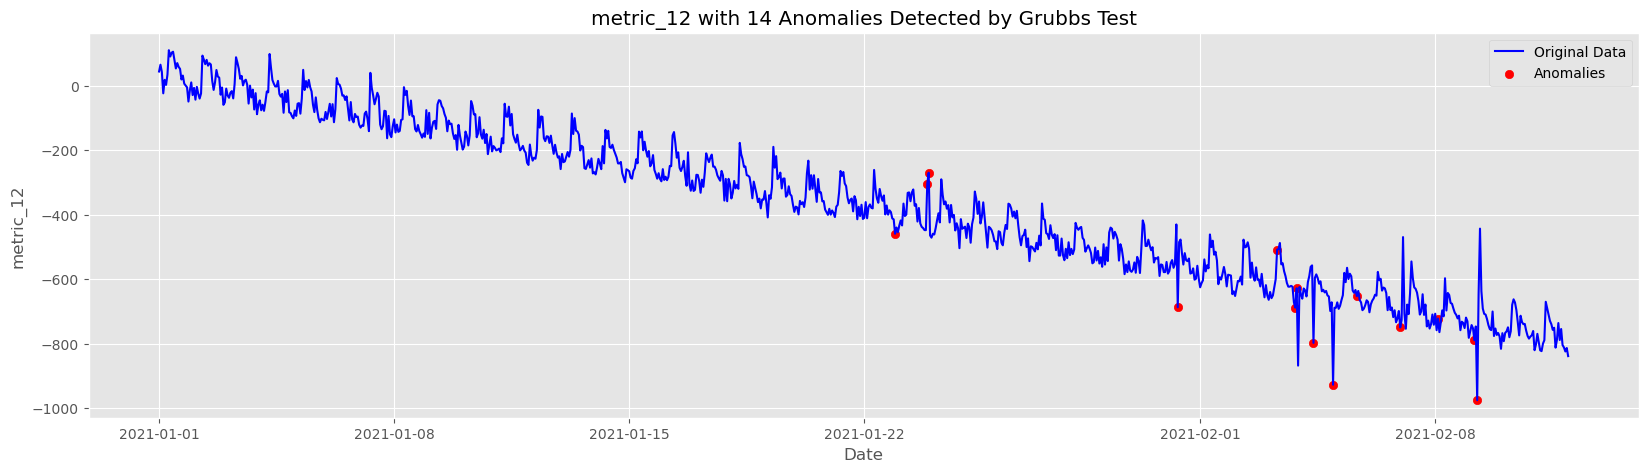

[909, 960, 983, 458, 884, 507, 922, 554, 530]


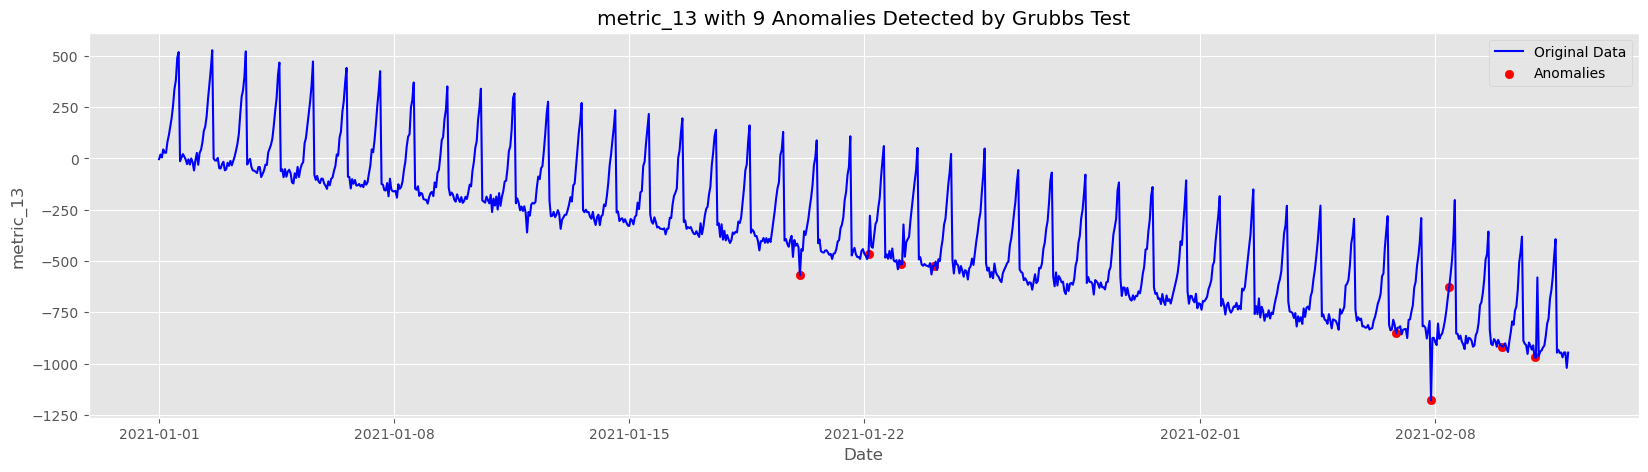

[839, 701, 664, 530, 625, 484, 629, 587, 808, 635, 853, 670, 267, 308, 597]


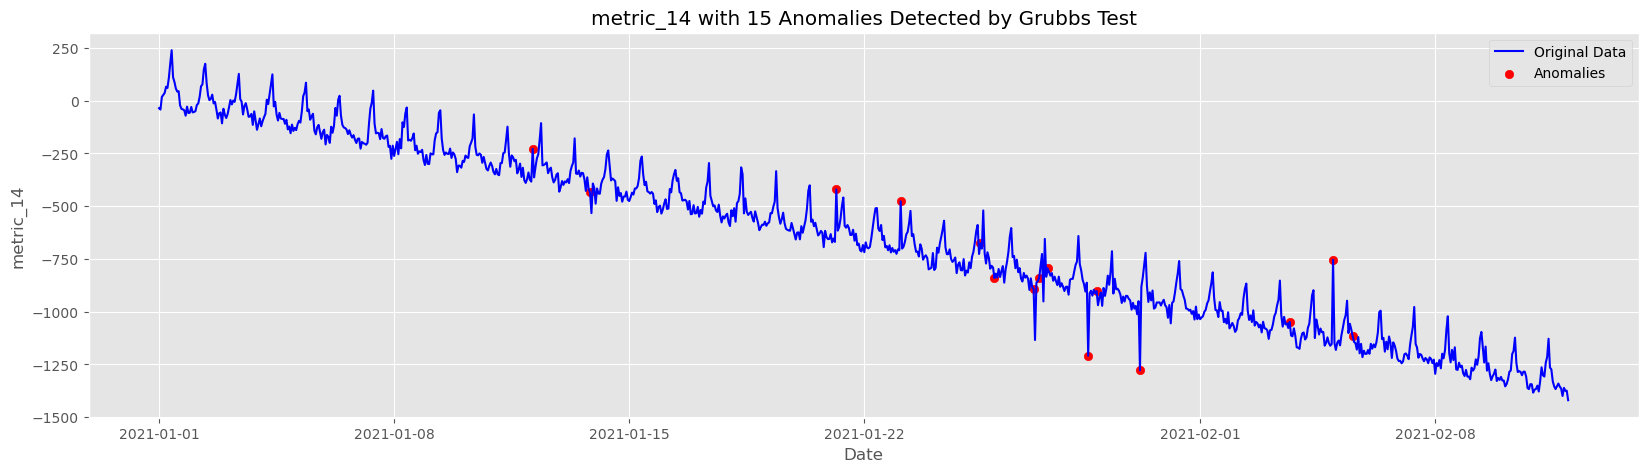

[767, 694, 498, 873, 434, 564, 366, 713]


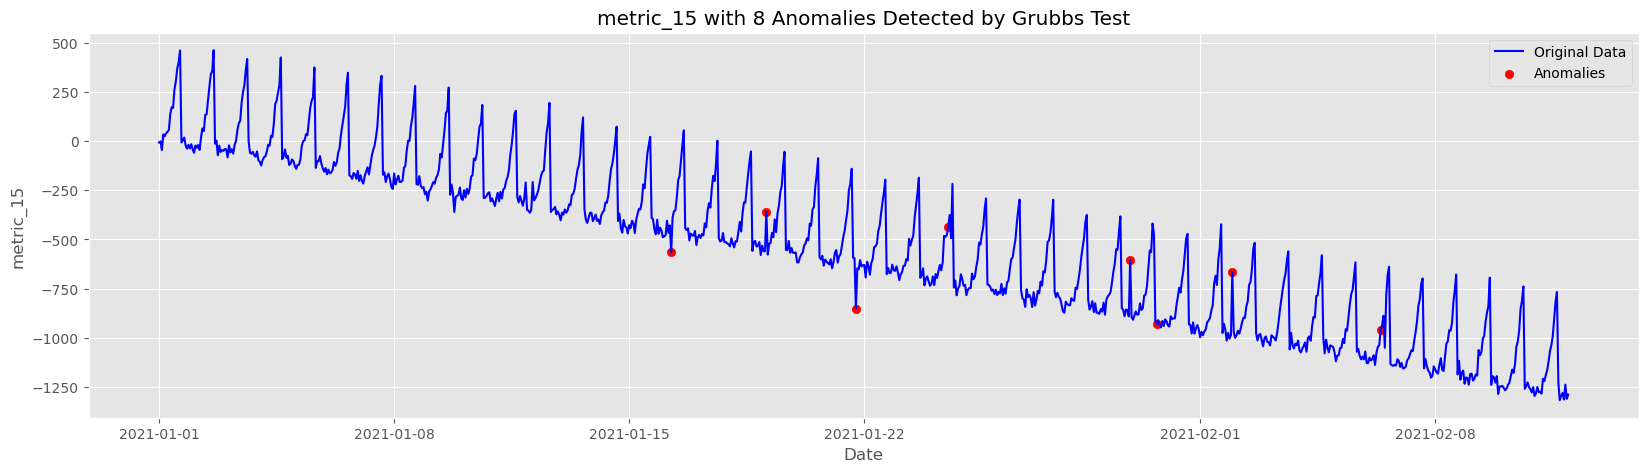

[950, 910, 766, 639, 694, 489, 428, 533, 401, 713, 658, 781, 962, 915, 508, 921, 610, 874, 509, 450]


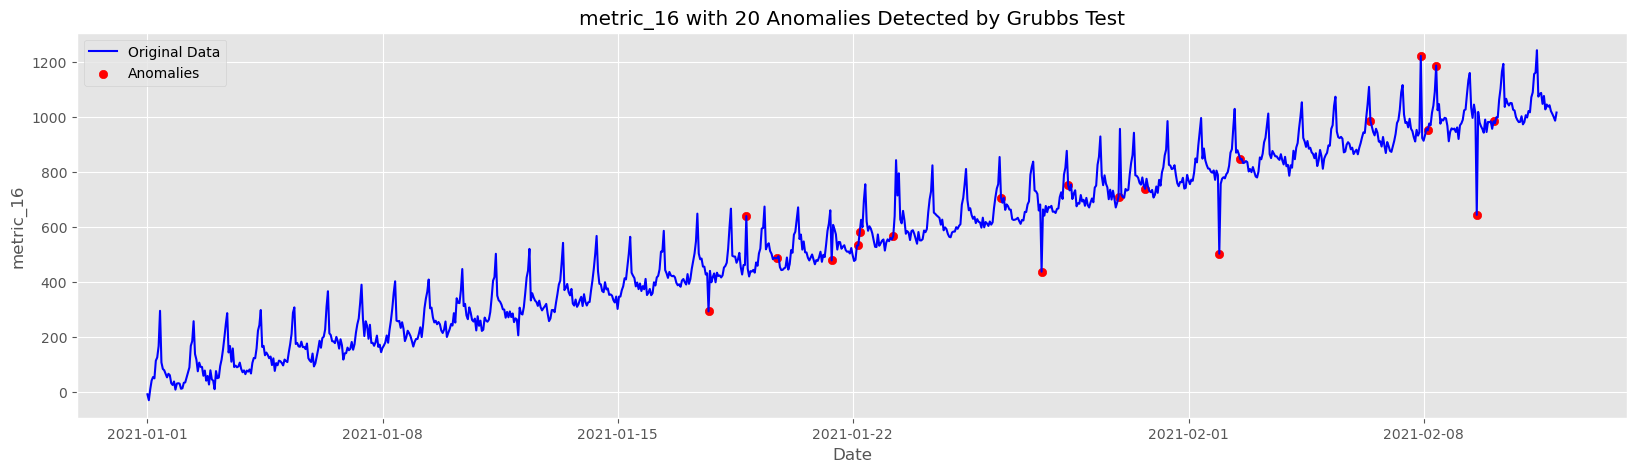

[947, 674, 626, 688, 509, 727, 331, 607, 662, 915]


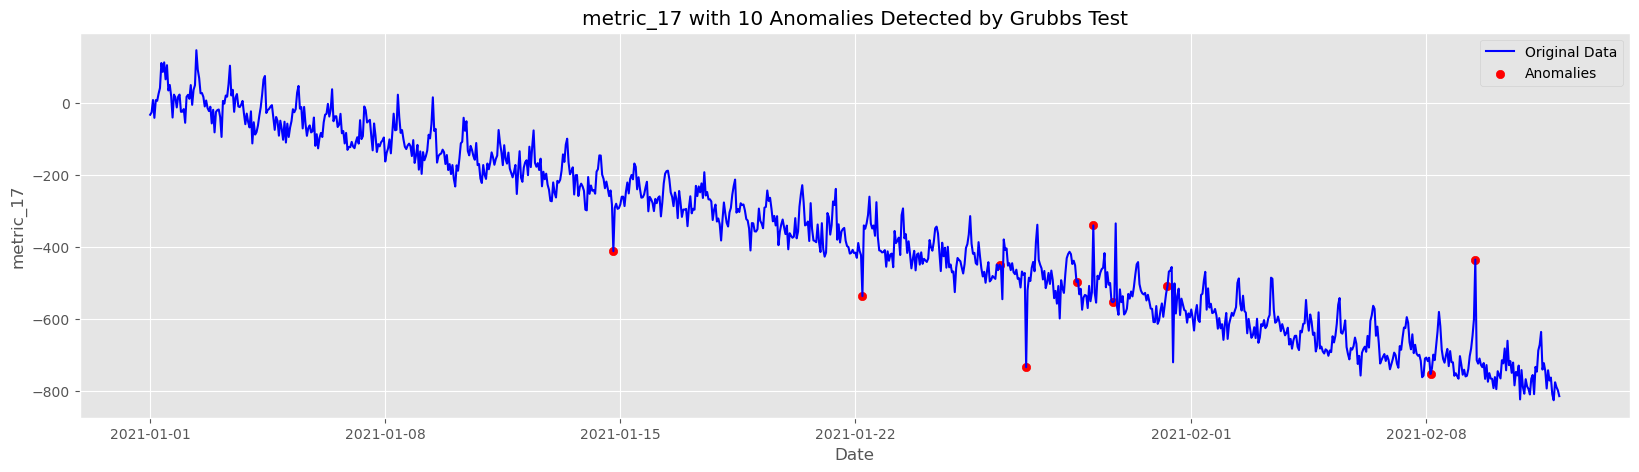

[962, 789, 752, 667, 641, 981, 451, 409, 640, 931, 443, 758, 301, 721, 271, 612, 800, 657]


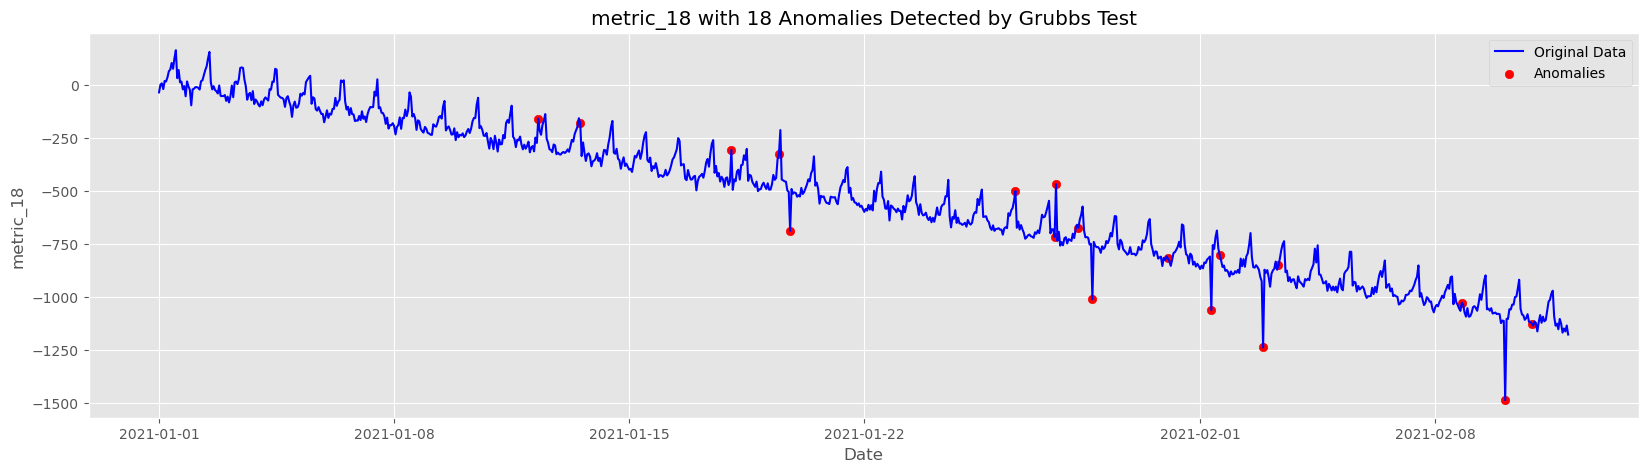

[706, 706, 759, 765, 537, 532, 416, 998, 974, 725, 426, 678, 723, 678, 773, 944, 281, 556, 777, 725, 391, 550]


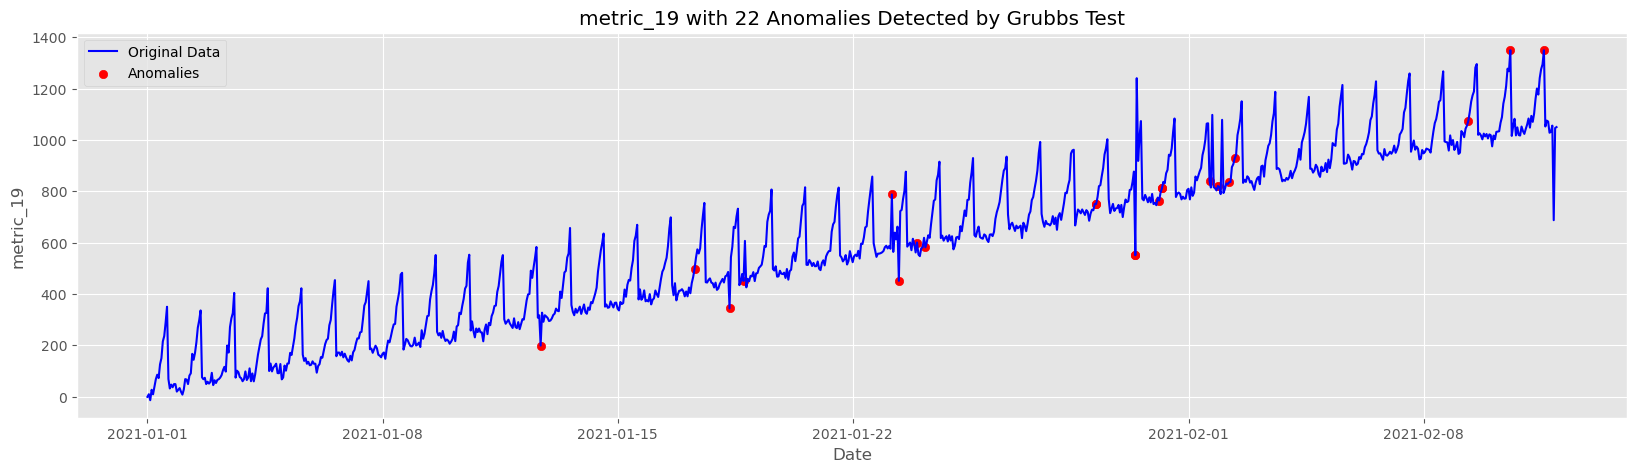

[501, 975, 610, 478, 996, 607, 468, 472, 394, 329, 473, 580, 495, 517]


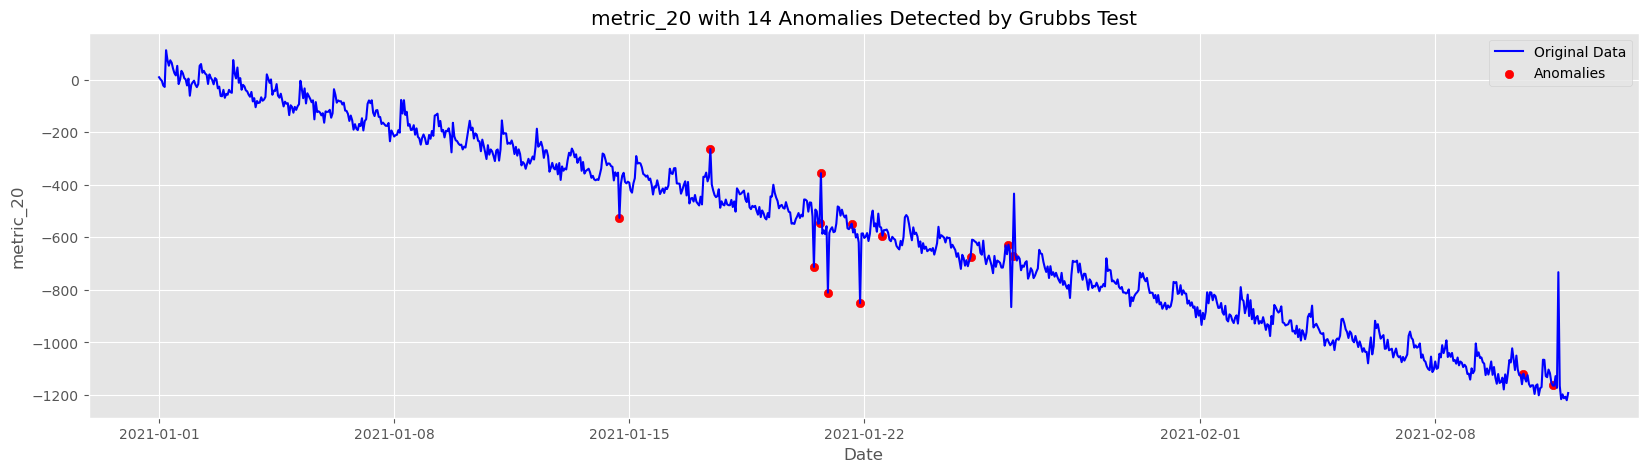

[863, 667, 557, 533, 777, 591, 522, 447, 879, 832, 385, 684, 461]


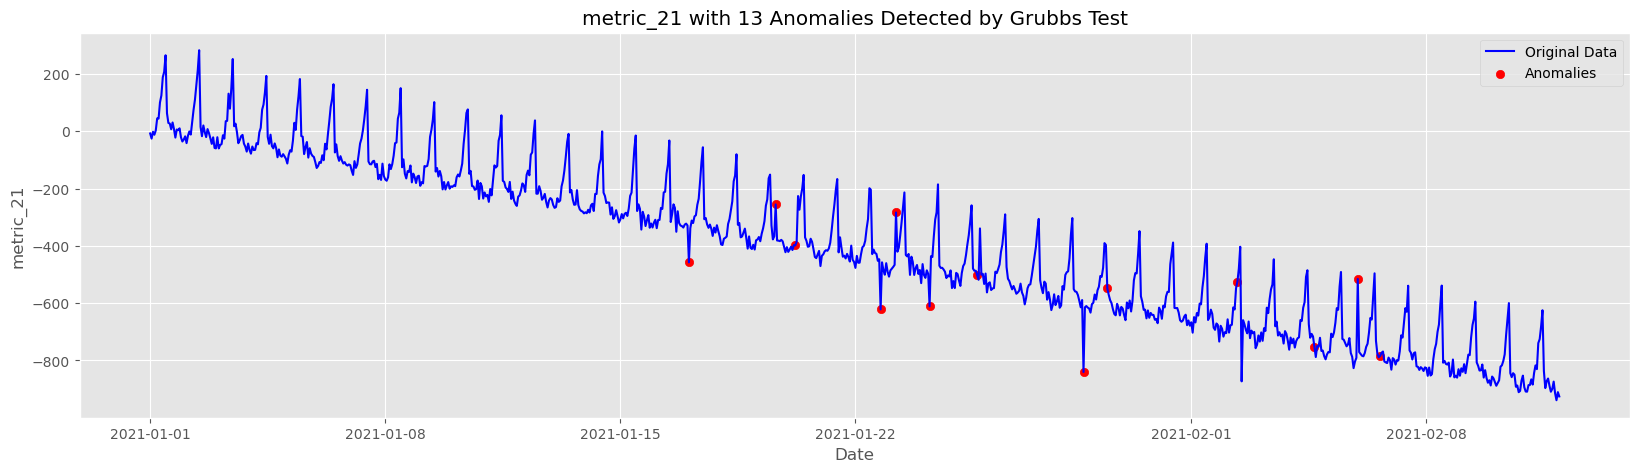

[982, 821, 722, 1003, 512, 536, 954, 794, 840, 743, 922]


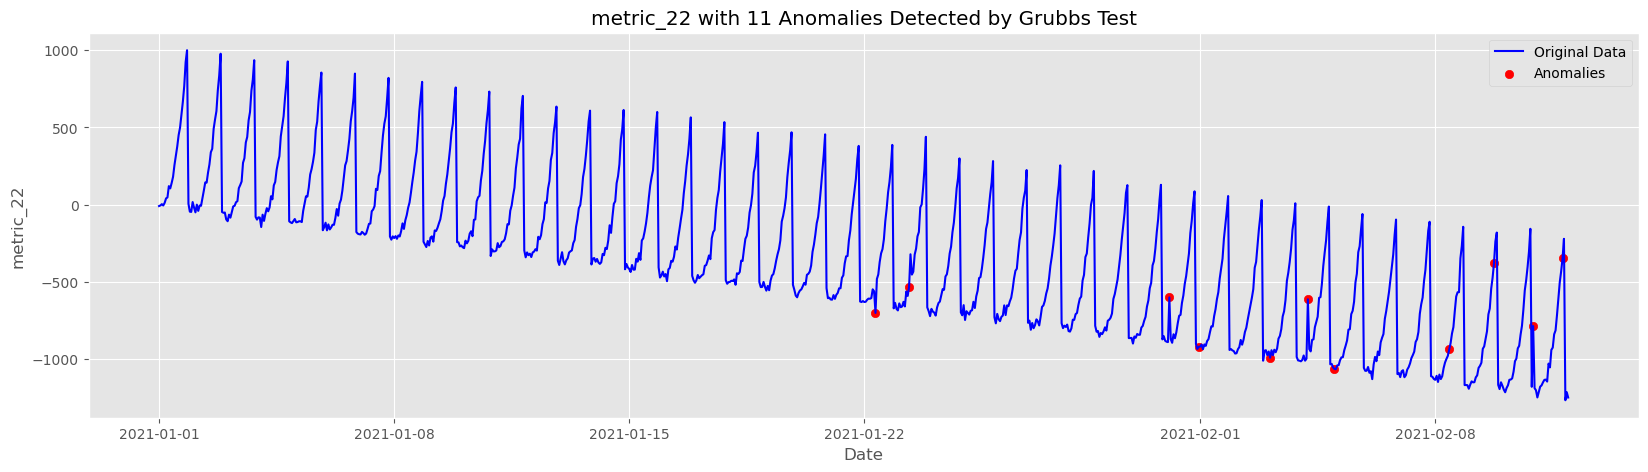

[909, 975, 692, 675, 565, 430, 438, 927, 992, 452]


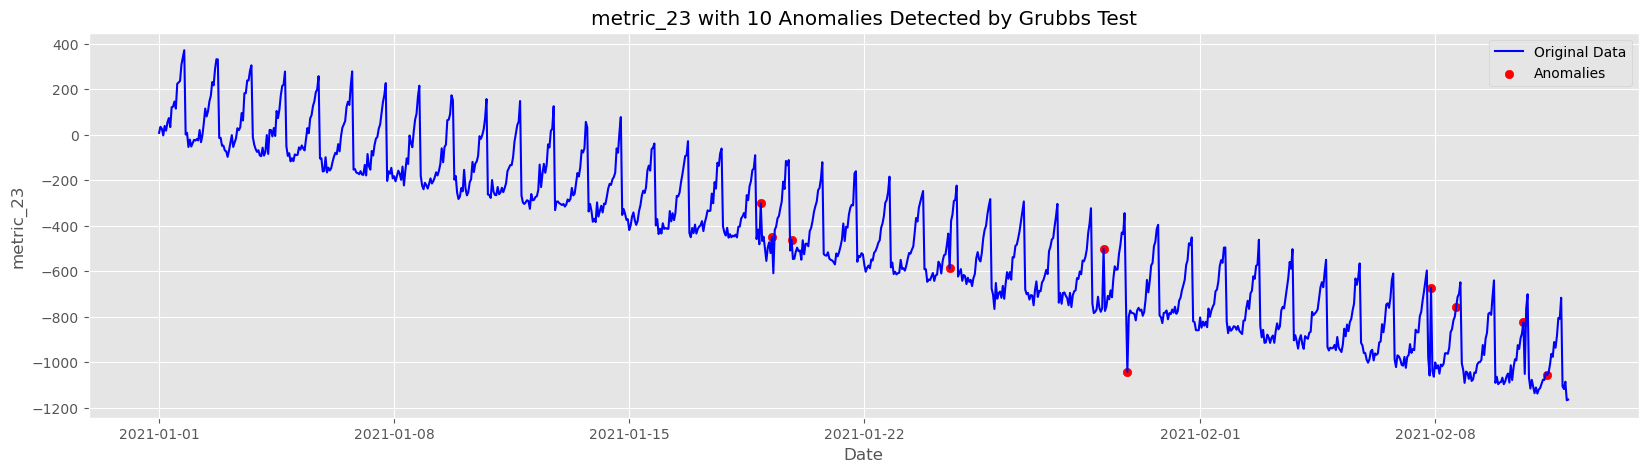

[831, 569, 554, 571, 745, 561, 536, 409, 587]


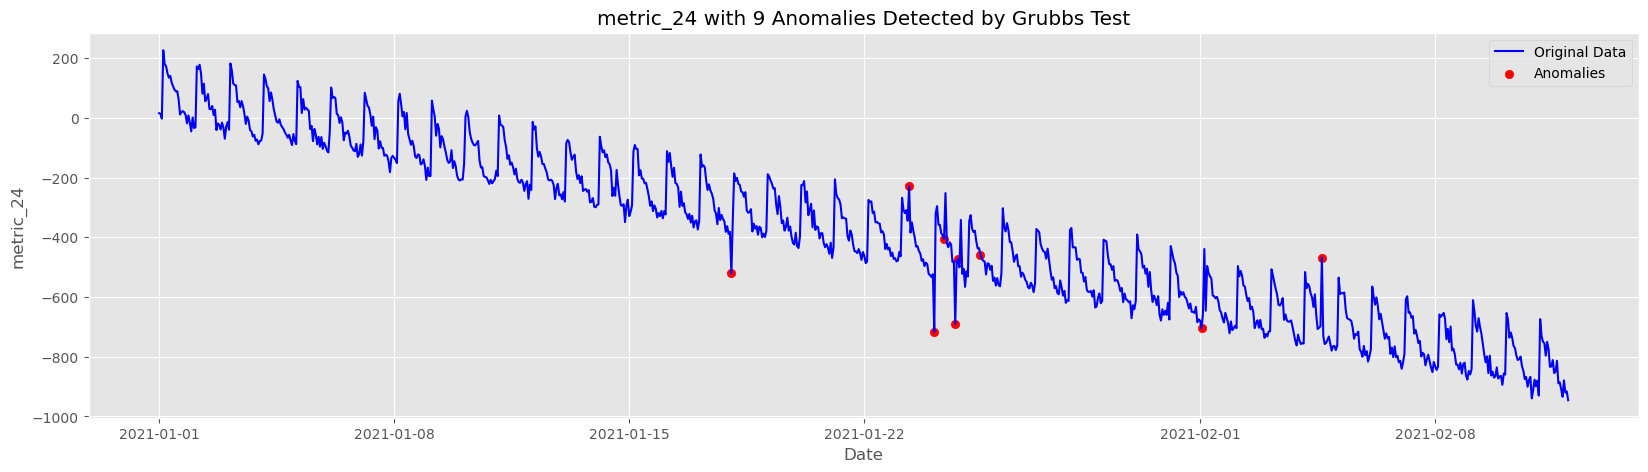

[947, 808, 747, 694, 966, 989, 346, 404, 608, 766, 778]


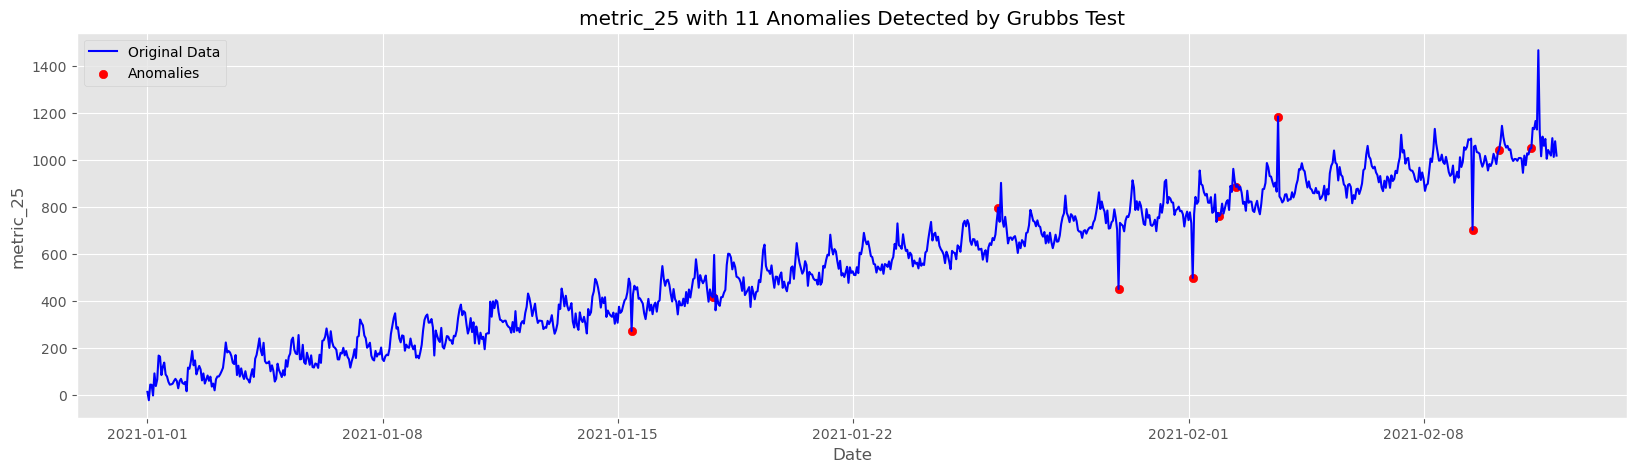

[747, 578, 708, 831, 538, 732, 436, 719, 333, 763, 512, 597, 289, 845, 798, 678]


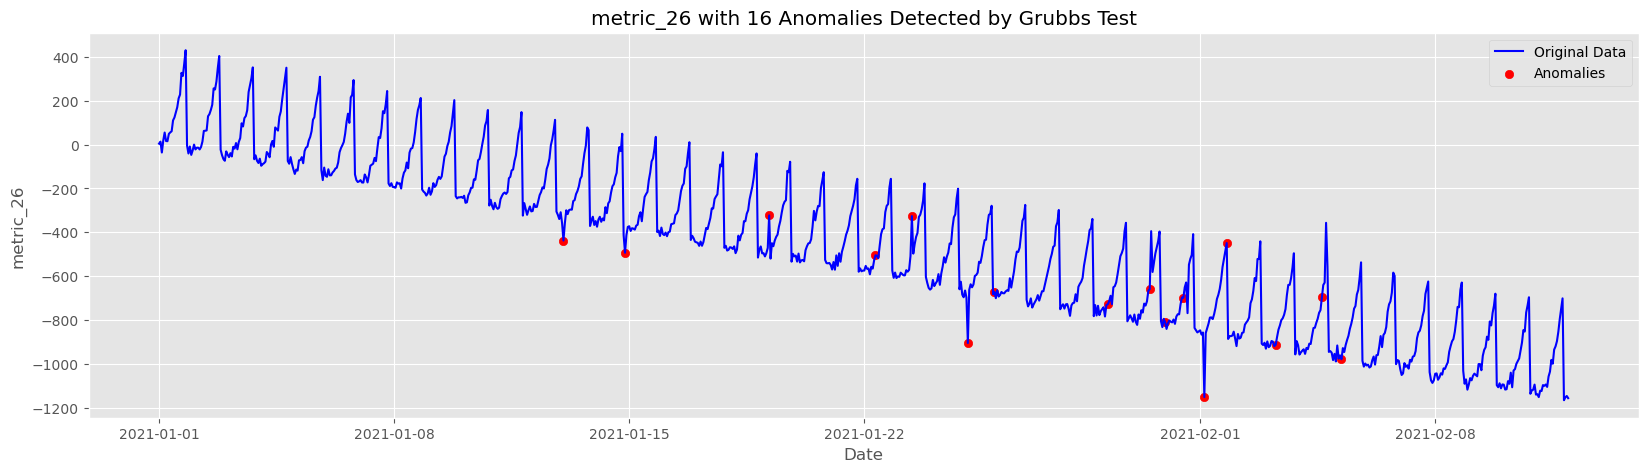

[910, 622, 975, 427, 997, 884, 930, 644, 597, 721, 347, 402, 943, 448, 992, 946, 500, 853, 366, 404, 567, 659, 689, 735, 289, 380, 909, 387]


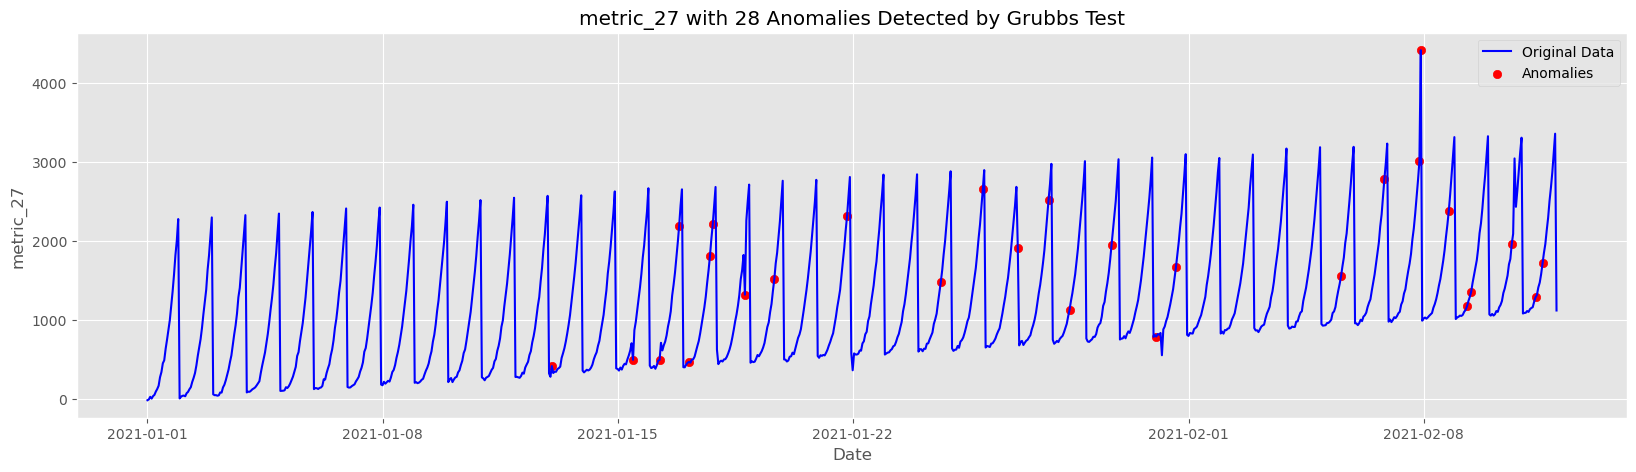

[860, 905, 820, 741, 645, 656, 529, 792, 425, 876, 874, 425]


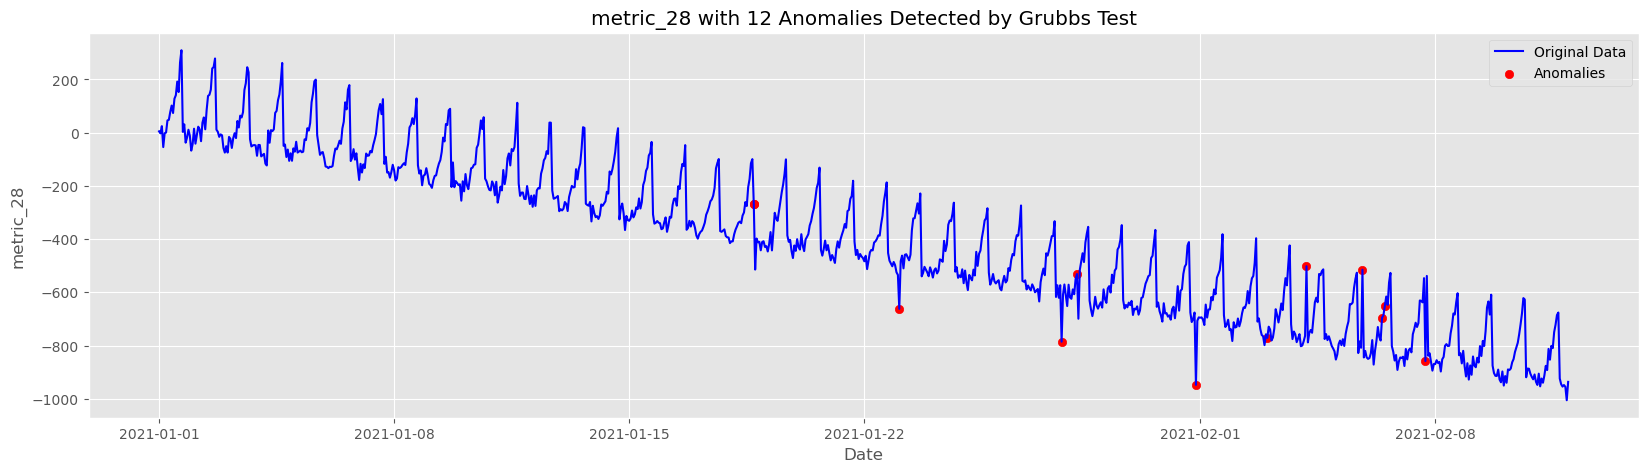

[611, 519, 508, 534, 463, 370, 414, 432, 627, 377, 355, 434, 488, 576, 503]


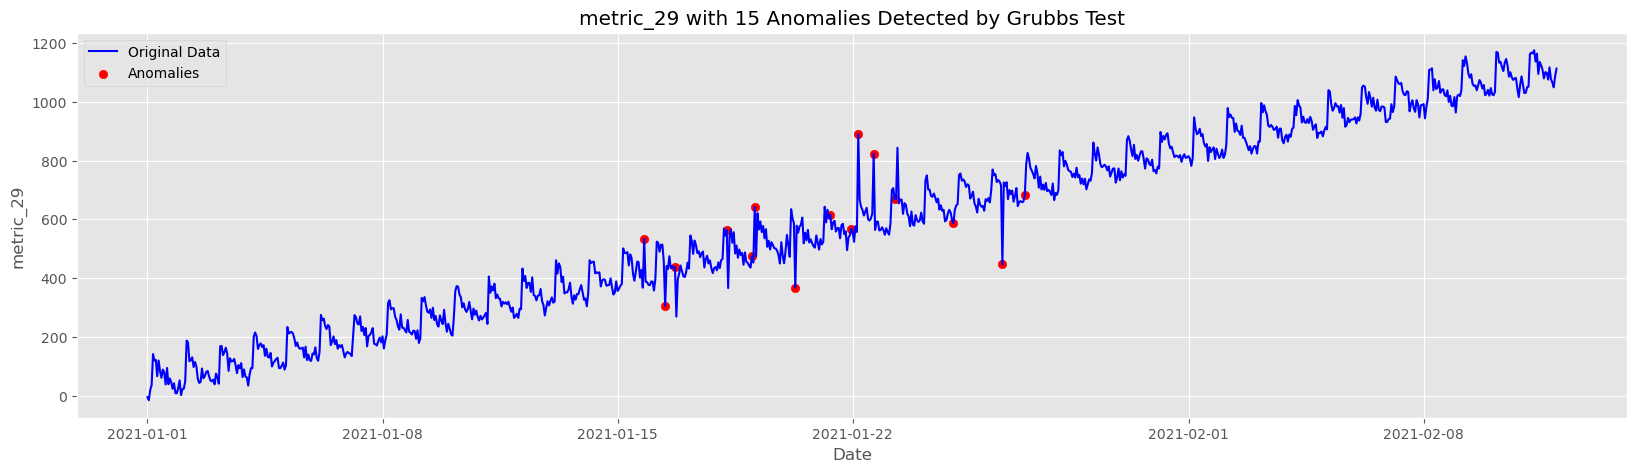

[834, 974, 852, 378, 763, 994, 677, 324, 789, 824, 805, 942, 598, 300, 847, 399, 781, 863, 296]


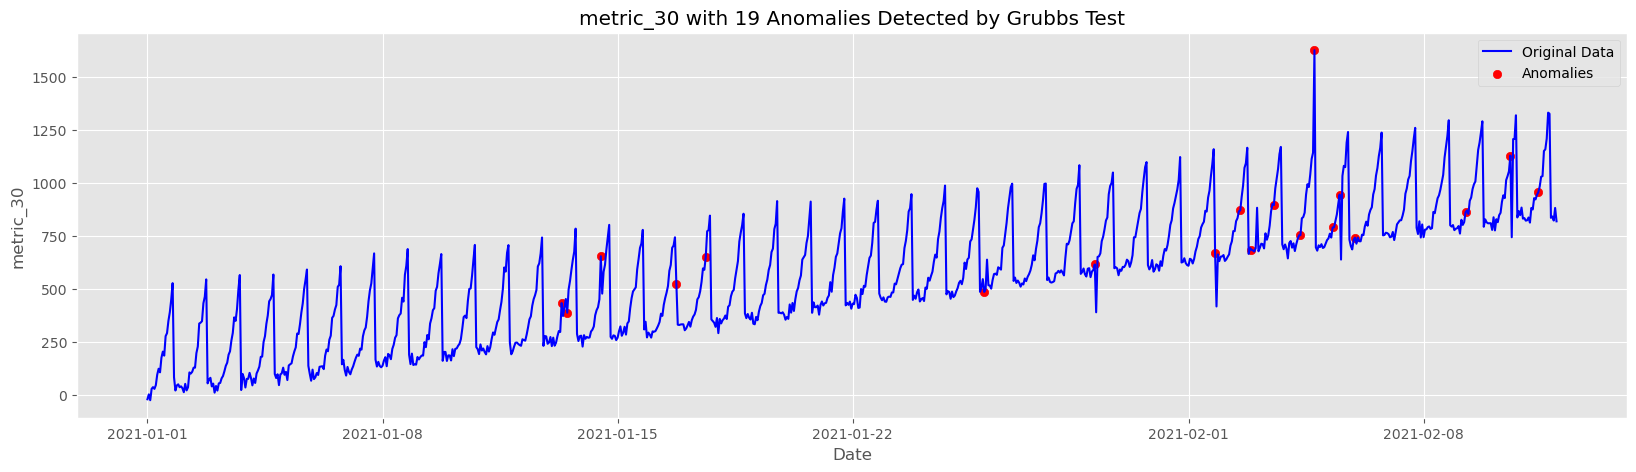

In [16]:
plt.style.use('ggplot')
for col in data.columns:
    # Perform STL decomposition on each metric
    stl = STL(data[col])
    result = stl.fit()
    seasonal, trend, resid = result.seasonal, result.trend, result.resid

    # Apply Grubbs' test to detect anomalies in the residual component
    mean = np.mean(resid)
    std_dev = np.std(resid)
    alpha = 0.05
    outliers = []

    while True:
        n = len(resid)
        t_value = t.ppf(1 - alpha / (2*n), n - 2)
        G_critical = (n - 1) / np.sqrt(n) * np.sqrt(t_value ** 2 / (n - 2 + t_value ** 2))
        G = np.max(np.abs(resid - mean)) / std_dev
        if G > G_critical:
            outlier_idx = np.argmax(np.abs(resid - mean))
            outliers.append(outlier_idx)
            resid = resid[resid != resid[outlier_idx]]
            n = len(resid)
            mean = np.mean(resid)
            std_dev = np.std(resid)
            G_critical = (n - 1) / np.sqrt(n) * np.sqrt(t_value ** 2 / (n - 2 + t_value ** 2))
        else:
            break

    # Plot the original data with anomalies highlighted
    print(outliers)
    fig, ax = plt.subplots(figsize=(20, 5))
    ax.plot(data[col], label='Original Data',color='b')
    ax.scatter(data.index[outliers], data[col][outliers], color='red', label='Anomalies')
    ax.set_xlabel('Date')
    ax.set_ylabel(col)
    ax.set_title(f'{col} with {len(outliers)} Anomalies Detected by Grubbs Test')
    ax.legend()
    plt.show()